# Basics of Statistics and R

Two key questions for <span style="color: purple"><b>exploratory data analysis</b></span> in statistics are:

1. Shape?
2. Outliers/skew?

For shape, we would like to know if the distribution appears to be uniform, exponential, binomial, bell-shaped or a fit with another common pattern. The key distribution in statistics is the **normal** (or bell-shaped) distribution. A *uniform* distribution is where all outcomes are equally likely? We have looked at distributions like the binomial, hypergeometric, geometric and negative binomial distributions. The most significant shape for introductory statistics is the<span style="color: purple"><b> normal distribution </b></span>since parametric statistical tests like the $z$-test, the $t$-test, ANOVA, and regression are built on assumptions of normality.

The second question we need to ask:<span style="color: purple"><b> do skew and outliers exist? </b></span>We need to know because we often must treat skewed data and data with outliers with great care and possibly different tools. The first steps of data analysis are to generate numeric descriptions of the data (descriptive statistics) and typical graphical displays of data like histograms, stem plots.

```{sidebar} Data Visualization 
Data scientists use more robust analytic tools and have entire courses on data visualization which is the art of creating visual displays that tell a story about the data. To understand more about the groundbreaking work in data science, check out several data visualizations at the Pew Research Center regarding [political beliefs in the US](https://www.pewresearch.org/fact-tank/2014/12/29/our-favorite-pew-research-center-data-visualizations-from-2014). Also check out this [blog post](https://visme.co/blog/best-data-visualizations) where data science and artwork intersect</a> or this marketing blog with [16 great examples](https://blog.hubspot.com/marketing/great-data-visualization-examples) of data visualizations. As data science progresses, more and more exciting avenues exist for displaying and visualizing data. In this course, we will provide the basic numeric and graphic approaches to summarizing data. You're learning some R coding along the way. By the end of this course, if you're interested, a few hours will be all you will need to teach yourself to produce some pretty powerful visualizations of your own with RStudio.
```

$$
\left\{x_{1},x_{2},\dots, x_{n}\right\} \in X
$$

## Parameters and Statistics

In statistics, we use two different sets of symbols to refer to the mean and standard deviation:

$$
\begin{array}{c|cc}
&\text{Population}&\text{Sample}\\ \hline
\text{AVG}&\mu&\bar{x}\\
\text{SD}&\sigma& s\\
\end{array}
$$

The population parameters $\mu$ and $\sigma$ are rarely known. Much of statistics is about estimating these parameters using the sample statistics $\bar{x}$ and $s$ respectively. For example, a poker player's distribution of winnings (per 100 hands) is a normal distribution. True win rates are not known. Winning poker players often suffer long colds streaks. Over time, things average out. We don't know Mandy's average win rate, $\mu$, but we can take sample of recent sessions and estimate it with $\bar{x}$.

```{admonition} Example 1
Suppose that Mandy's winnings from her most recent 20 cash poker sessions is given in the table below. Let's find the descriptive statistics and plot some standard statistical graphics using this data.
```

<table style="width:60%">
  <tr>
    <td style='text-align:center; vertical-align:middle'>28</td>
    <td style='text-align:center; vertical-align:middle'>11</td>
    <td style='text-align:center; vertical-align:middle'>18</td>
    <td style='text-align:center; vertical-align:middle'>35</td>
    <td style='text-align:center; vertical-align:middle'>36</td>
    <td style='text-align:center; vertical-align:middle'>6</td>
    <td style='text-align:center; vertical-align:middle'>-38</td>
    <td style='text-align:center; vertical-align:middle'>14</td>
    <td style='text-align:center; vertical-align:middle'>-19</td>
    <td style='text-align:center; vertical-align:middle'>43</td>
  </tr>
  <tr>
    <td style='text-align:center; vertical-align:middle'>-14</td>
    <td style='text-align:center; vertical-align:middle'>-30</td>
    <td style='text-align:center; vertical-align:middle'>-16</td>
    <td style='text-align:center; vertical-align:middle'>-25</td>
    <td style='text-align:center; vertical-align:middle'>0</td>
    <td style='text-align:center; vertical-align:middle'>40</td>
    <td style='text-align:center; vertical-align:middle'>16</td>
    <td style='text-align:center; vertical-align:middle'>-79</td>
    <td style='text-align:center; vertical-align:middle'>3</td>
    <td style='text-align:center; vertical-align:middle'>1</td>
  </tr>
</table>

### Loading Data into a Vector Manually

We use the concatenate function **c** to create the vector of integers. **Concatenate** means to join together, and most computer programming languages have a function that does almost exactly what **c** does as shown below:

In [73]:
W <- c( 28, 11, 18, 35, 36, 6, -38, 14, -19, 43, -14, -30, -16, -25, 0, 40, 16, -79, 3, 11)

## Descriptive Statistics

The *mean*, *standard deviation*, and *sample size* ($n$) are the key descriptives because almost every statistical test is calculated based upon them. We also will typically include the **5-Number Summary** as it will help us especially when we have a skewed data set. The functions we will use to gather the key descriptives are as follows:

- Average: **mean()**
- Standard Deviation: **sd()**
- Sample Size: **length()**

For the 5-Number Summary, we use the function **summary()**.

In [74]:
m <- mean(W)
s <- sd(W)
n <- length(W)

### Output in R

Often, we wish to summarize and organize output, and the function **cat()** helps us to do so. The *cat* function is a hybrid of the concatenate function and print function. Thus, we can join together strings of text, outputs of variables and even calculations as needed.

The example below is a code cell we will copy, paste and reuse throughout the course.

In [75]:
cat ("Descriptive Statistics: \n  mean =", m, "\n  standard deviation =", s, "\n  sample size =", n,"\n\nThe 5-number summary is shown below.")
summary(W)

Descriptive Statistics: 
  mean = 2 
  standard deviation = 30.57347 
  sample size = 20 

The 5-number summary is shown below.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -79.00  -16.75    8.50    2.00   20.50   43.00 

The most interesting point of analysis we can see already is that the mean is a good bit lower than the median. This can and often does indicate skew and a potential for outliers.

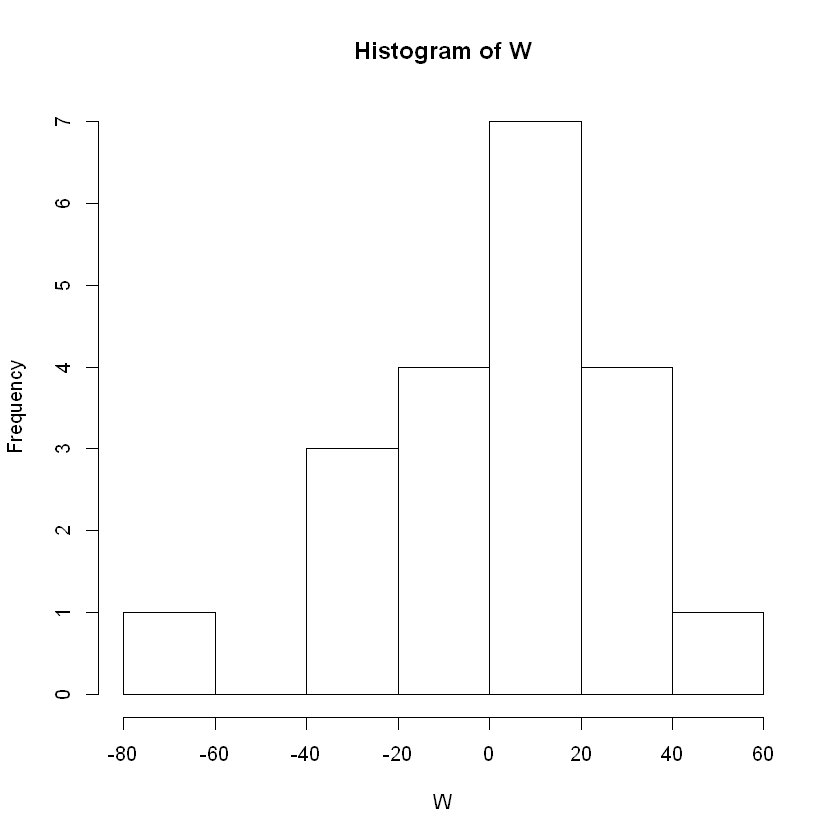

In [76]:
hist(W)

The histogram confirms the skew to the left that we identified above. The distribution appears to be approximately normal (or bell-shaped) and skewed left. The tail to the left comprises 4 bars while the tail to the right comprises only 2. The direction of skew, if any, is in the same direction as the longest tail in the histogram.

## Subsetting Data and Grouping by Category

First, let's load a data frame from an Excel spreadsheet using the URL. We will call the data frame **p** as it contains the personality data set collected pursuant to an undergraduate research project on sense of humor. Notice that we use **read.csv()** for the upload and the function **head()** to summarize the data frame by showing only its top five rows. Many data frames will be far to large to print out completely.

In [77]:
p <- read.csv('https://faculty.ung.edu/rsinn/data/personality.csv')
head(p,5)

Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,...,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
21,2,M,Y,Y,1,N,N,N,3.23,...,105,10,142,8,11,41,40,26,27,SE
20,3,F,N,N,2,Y,N,Y,3.95,...,105,3,172,16,11,46,52,26,33,SE
22,3,M,Y,N,2,N,N,N,3.06,...,73,1,134,15,11,48,42,44,29,AG
27,3,F,Y,N,3,N,N,N,2.84,...,90,9,160,16,10,51,51,23,19,SE
24,3,M,Y,N,2,N,N,N,2.39,...,95,5,166,14,10,56,46,27,20,AF


We have a quick way to determine the size of the data frame using the functions **nrows()** and **ncols()**.

In [78]:
nrow(p)
ncol(p)

[1] 129

[1] 36

In this data set, we had 129 UNG Dahlonega students answer questions that comprised 36 variables. Most data frames are constructed in a similar way: columns are variables and rows are the individuals that were studied. Note that, by individuals, we might mean house prices, lab rats, or the fuel mileage of vehicles.

### Subsetting a Data Frame

To create a new data frame that contains only the first 10 columns of **p**, we can do this:

In [79]:
new_p <- p[1:10]
head(new_p,5)

Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA
21,2,M,Y,Y,1,N,N,N,3.23
20,3,F,N,N,2,Y,N,Y,3.95
22,3,M,Y,N,2,N,N,N,3.06
27,3,F,Y,N,3,N,N,N,2.84
24,3,M,Y,N,2,N,N,N,2.39


Notice that $n:k$ is a command in R that produces all integers from $n$ to $k$ inclusive. The [] indicates that we wish to create a subset of the data frame named. We can use the *concatenate* function to list non-adjacent column numbers:

In [80]:
new2_p <- p[c(1:3, 14, 20, 27, 31)]
head(new2_p,5)

Age,Yr,Sex,AccDate,Thrill,Perf,Narc
21,2,M,N,23,105,11
20,3,F,Y,25,105,11
22,3,M,Y,27,73,11
27,3,F,N,21,90,10
24,3,M,N,30,95,10


In a similar way, we can use the concatenate function along with column titles which must be within quotation marks.

In [81]:
new3_p <- p[c('Sex', 'Thrill')]
head(new3_p,5)

Sex,Thrill
M,23
F,25
M,27
F,21
M,30


### Pivot Tables

We also have a quick ways to summarize 2 category variables in a 2-way table or pivot table:

In [83]:
xtabs(~Sex + AccDate, data = p)

   AccDate
Sex  N  Y
  F 28 46
  M 28 27

We will talk more later in these notes about statistical formulas and what they convey.